In [54]:
import six
import sys
sys.modules['sklearn.externals.six'] = six

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import mlrose_hiive as mlrose
import mlrose as mlrose_old
from sklearn.metrics import accuracy_score, f1_score, mean_squared_error
import seaborn as sns
import time

from mlrose_hiive.algorithms.decay import GeomDecay


#Random State
rs = 614

In [32]:
class Data():
    def dataAllocation(self, path):
        df = pd.read_csv(path)
        x_data = df[['PriorDefault','Employed','CreditScore','YearsEmployed','Debt']].copy()
        y_data = df['Approved'].copy()
        return x_data,y_data

    def trainSets(self,x_data,y_data):
        x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.3, random_state = rs, shuffle = True)
        return x_train, x_test, y_train, y_test
dataset = Data()
x1_data,y1_data = dataset.dataAllocation('clean_dataset.csv')
x1_train, x1_test, y1_train, y1_test = dataset.trainSets(x1_data,y1_data)
scaler = StandardScaler()
scaled_x1_train = scaler.fit_transform(x1_train)
scaled_x1_test = scaler.transform(x1_test)

In [33]:
y1_data.head()

0    1
1    1
2    1
3    1
4    1
Name: Approved, dtype: int64

In [128]:
results = []
algorithm = 'gradient_descent'
print(algorithm)
for i in range(1, 5002, 100):
        model = mlrose.NeuralNetwork(hidden_nodes=[2], activation='sigmoid',
                                        algorithm='gradient_descent', max_iters=i,
                                        bias=True, is_classifier=True, learning_rate=0.01,
                                        early_stopping=True, clip_max=5, max_attempts=100,
                                        random_state=rs)
        start = time.time()    
        model.fit(scaled_x1_train, y1_train)
        traintime = time.time()-start
        start = time.time() 
        y_train_pred = model.predict(scaled_x1_train)
        testime = time.time()-start
        y_train_accuracy = accuracy_score(y1_train, y_train_pred)

        y_test_pred = model.predict(scaled_x1_test)
        y_test_accuracy = accuracy_score(y1_test, y_test_pred)
        
        y_test_error = mean_squared_error(y1_test, y_test_pred)

        f1score = f1_score(y1_test, y_test_pred)

        results.append([i, algorithm, y_train_accuracy, y_test_accuracy,y_test_error, f1score])
        print([i, algorithm, y_train_accuracy, y_test_accuracy,y_test_error, f1score])

gradient_descent
[1, 'gradient_descent', 0.5548654244306418, 0.5797101449275363, 0.42028985507246375, 0.3255813953488372]
[101, 'gradient_descent', 0.84472049689441, 0.8454106280193237, 0.15458937198067632, 0.8202247191011236]
[201, 'gradient_descent', 0.8571428571428571, 0.8357487922705314, 0.1642512077294686, 0.8111111111111111]
[301, 'gradient_descent', 0.8530020703933747, 0.8599033816425121, 0.14009661835748793, 0.8557213930348259]
[401, 'gradient_descent', 0.8530020703933747, 0.8599033816425121, 0.14009661835748793, 0.8557213930348259]
[501, 'gradient_descent', 0.8530020703933747, 0.8599033816425121, 0.14009661835748793, 0.8557213930348259]
[601, 'gradient_descent', 0.8530020703933747, 0.8599033816425121, 0.14009661835748793, 0.8557213930348259]
[701, 'gradient_descent', 0.8530020703933747, 0.8599033816425121, 0.14009661835748793, 0.8557213930348259]
[801, 'gradient_descent', 0.8530020703933747, 0.8599033816425121, 0.14009661835748793, 0.8557213930348259]
[901, 'gradient_descent',

In [49]:
df = pd.DataFrame(results, columns=["Iterations", "Algorithm", "Train Accuracy", "Test Accuracy", "F1 Score"])


<AxesSubplot:xlabel='Iterations', ylabel='Test Accuracy'>

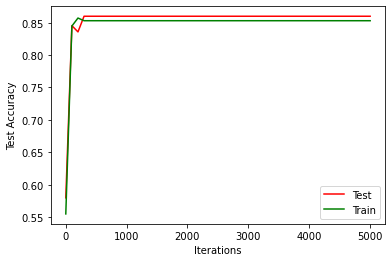

In [65]:
sns.lineplot(data=df, x="Iterations", y="Test Accuracy", label = 'Test',color = 'r')
sns.lineplot(data=df, x="Iterations", y="Train Accuracy",label = 'Train',color = 'g')


## 

In [92]:
results = []
algorithm = 'random_hill_climb'
for i in range(1, 5002, 100):
        model = mlrose.NeuralNetwork(hidden_nodes=[4], activation='tanh',
                                        algorithm=algorithm, max_iters=i,
                                        bias=True, is_classifier=True, learning_rate=0.5,
                                        early_stopping=True, clip_max=5, max_attempts=100,
                                        random_state=rs)
        model.fit(scaled_x1_train, y1_train)
        y_train_pred = model.predict(scaled_x1_train)
        y_train_accuracy = accuracy_score(y1_train, y_train_pred)

        y_test_pred = model.predict(scaled_x1_test)
        y_test_accuracy = accuracy_score(y1_test, y_test_pred)

        f1score = f1_score(y1_test, y_test_pred)

        results.append([i, algorithm, y_train_accuracy, y_test_accuracy, f1score])
        print([i, algorithm, y_train_accuracy, y_test_accuracy, f1score])

[1, 'random_hill_climb', 0.5527950310559007, 0.5217391304347826, 0.6425992779783394]
[101, 'random_hill_climb', 0.8592132505175983, 0.8502415458937198, 0.841025641025641]
[201, 'random_hill_climb', 0.865424430641822, 0.8502415458937198, 0.8342245989304814]
[301, 'random_hill_climb', 0.8612836438923396, 0.8454106280193237, 0.8279569892473119]
[401, 'random_hill_climb', 0.8612836438923396, 0.8502415458937198, 0.8342245989304814]
[501, 'random_hill_climb', 0.8633540372670807, 0.8502415458937198, 0.8342245989304814]
[601, 'random_hill_climb', 0.8633540372670807, 0.8502415458937198, 0.8342245989304814]
[701, 'random_hill_climb', 0.8633540372670807, 0.8502415458937198, 0.8342245989304814]
[801, 'random_hill_climb', 0.8633540372670807, 0.8502415458937198, 0.8342245989304814]
[901, 'random_hill_climb', 0.8633540372670807, 0.8502415458937198, 0.8342245989304814]
[1001, 'random_hill_climb', 0.8633540372670807, 0.8502415458937198, 0.8342245989304814]
[1101, 'random_hill_climb', 0.8633540372670807

In [95]:
df = pd.DataFrame(results, columns=["Iterations", "Algorithm", "Train Accuracy", "Test Accuracy", "F1 Score"])


<AxesSubplot:xlabel='Iterations', ylabel='Test Accuracy'>

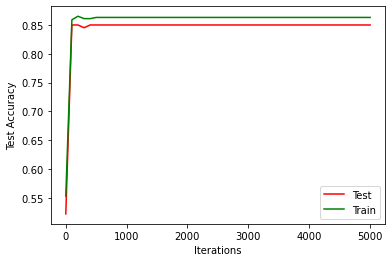

In [97]:
sns.lineplot(data=df, x="Iterations", y="Test Accuracy",color = "r", label='Test')
sns.lineplot(data=df, x="Iterations", y="Train Accuracy", color="g", label= 'Train')


<AxesSubplot:xlabel='Iterations', ylabel='Test Accuracy'>

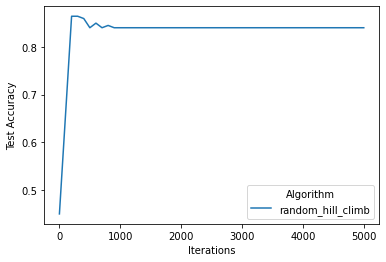

In [13]:
sns.lineplot(data=df, x="Iterations", y="Test Accuracy", hue="Algorithm")


In [87]:
results = []
algorithm = 'random_hill_climb'
for i in range(1, 100, 10):
        model = mlrose.NeuralNetwork(hidden_nodes=[4], activation='tanh',
                                        algorithm=algorithm, max_iters=500,
                                        bias=True, is_classifier=True, learning_rate=i/100,
                                        early_stopping=True, clip_max=5, max_attempts=100,
                                        random_state=rs)
        model.fit(scaled_x1_train, y1_train)
        y_train_pred = model.predict(scaled_x1_train)
        y_train_accuracy = accuracy_score(y1_train, y_train_pred)

        y_test_pred = model.predict(scaled_x1_test)
        y_test_accuracy = accuracy_score(y1_test, y_test_pred)

        f1score = f1_score(y1_test, y_test_pred)

        results.append([i/100, algorithm, y_train_accuracy, y_test_accuracy, f1score])
        print([i/100, algorithm, y_train_accuracy, y_test_accuracy, f1score])

[0.01, 'random_hill_climb', 0.7701863354037267, 0.7922705314009661, 0.8]
[0.11, 'random_hill_climb', 0.8571428571428571, 0.8454106280193237, 0.8279569892473119]
[0.21, 'random_hill_climb', 0.8674948240165632, 0.8502415458937198, 0.8359788359788359]
[0.31, 'random_hill_climb', 0.8592132505175983, 0.8405797101449275, 0.8156424581005587]
[0.41, 'random_hill_climb', 0.8633540372670807, 0.855072463768116, 0.84375]
[0.51, 'random_hill_climb', 0.865424430641822, 0.8454106280193237, 0.8297872340425532]
[0.61, 'random_hill_climb', 0.855072463768116, 0.8454106280193237, 0.8383838383838383]
[0.71, 'random_hill_climb', 0.855072463768116, 0.8309178743961353, 0.8108108108108107]
[0.81, 'random_hill_climb', 0.8674948240165632, 0.855072463768116, 0.84375]
[0.91, 'random_hill_climb', 0.8488612836438924, 0.8454106280193237, 0.8383838383838383]


In [88]:
df = pd.DataFrame(results, columns=["learning_rate", "Algorithm", "Train Accuracy", "Test Accuracy", "F1 Score"])


<AxesSubplot:xlabel='learning_rate', ylabel='Test Accuracy'>

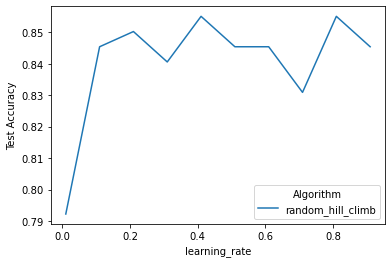

In [91]:
sns.lineplot(data=df, x="learning_rate", y="Test Accuracy", hue="Algorithm")


In [14]:
results = []
for i in range(1, 11):
    model = mlrose.NeuralNetwork(hidden_nodes=[4], activation='relu',
                                algorithm=algorithm, max_iters=2000,
                                bias=True, is_classifier=True, learning_rate=0.1,
                                early_stopping=True, clip_max=5, max_attempts=100,
                                restarts=10)
    model.fit(scaled_x1_train, y1_train)
    y_train_pred = model.predict(scaled_x1_train)
    y_train_accuracy = accuracy_score(y1_train, y_train_pred)

    y_test_pred = model.predict(scaled_x1_test)
    y_test_accuracy = accuracy_score(y1_test, y_test_pred)

    f1score = f1_score(y1_test, y_test_pred)
    results.append([i, algorithm, y_train_accuracy, y_test_accuracy, f1score])
    print([i, algorithm, y_train_accuracy, y_test_accuracy, f1score])

[1, 'random_hill_climb', 0.8695652173913043, 0.8695652173913043, 0.8586387434554974]
[2, 'random_hill_climb', 0.8612836438923396, 0.8599033816425121, 0.8465608465608465]
[3, 'random_hill_climb', 0.8612836438923396, 0.8405797101449275, 0.8253968253968254]
[4, 'random_hill_climb', 0.8530020703933747, 0.8454106280193237, 0.8350515463917527]
[5, 'random_hill_climb', 0.8612836438923396, 0.855072463768116, 0.8421052631578948]
[6, 'random_hill_climb', 0.8612836438923396, 0.8405797101449275, 0.83248730964467]
[7, 'random_hill_climb', 0.8509316770186336, 0.8599033816425121, 0.8542713567839196]
[8, 'random_hill_climb', 0.855072463768116, 0.8695652173913043, 0.8586387434554974]
[9, 'random_hill_climb', 0.8612836438923396, 0.855072463768116, 0.8404255319148937]
[10, 'random_hill_climb', 0.8592132505175983, 0.8502415458937198, 0.837696335078534]


<AxesSubplot:xlabel='Runs', ylabel='F1 Score'>

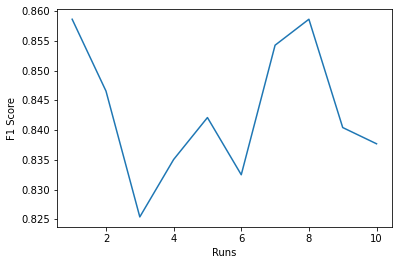

In [15]:

runs = pd.DataFrame(results, columns=["Runs", "Algorithm", "Train Accuracy", "Test Accuracy", "F1 Score"])
sns.lineplot(data=runs, x="Runs", y="F1 Score")

In [17]:
results = []
for i in range(1, 11):
    model = mlrose.NeuralNetwork(hidden_nodes=[4], activation='sigmoid',
                                algorithm=algorithm, max_iters=2000,
                                bias=True, is_classifier=True, learning_rate=0.1,
                                early_stopping=True, clip_max=5, max_attempts=100,
                                restarts=10)
    model.fit(scaled_x1_train, y1_train)
    y_train_pred = model.predict(scaled_x1_train)
    y_train_accuracy = accuracy_score(y1_train, y_train_pred)

    y_test_pred = model.predict(scaled_x1_test)
    y_test_accuracy = accuracy_score(y1_test, y_test_pred)

    f1score = f1_score(y1_test, y_test_pred)
    results.append([i, algorithm, y_train_accuracy, y_test_accuracy, f1score])
    print([i, algorithm, y_train_accuracy, y_test_accuracy, f1score])

[1, 'random_hill_climb', 0.865424430641822, 0.855072463768116, 0.8404255319148937]
[2, 'random_hill_climb', 0.8612836438923396, 0.8502415458937198, 0.837696335078534]
[3, 'random_hill_climb', 0.8674948240165632, 0.855072463768116, 0.8404255319148937]
[4, 'random_hill_climb', 0.865424430641822, 0.8454106280193237, 0.8297872340425532]
[5, 'random_hill_climb', 0.855072463768116, 0.8599033816425121, 0.8542713567839196]
[6, 'random_hill_climb', 0.8592132505175983, 0.855072463768116, 0.8404255319148937]
[7, 'random_hill_climb', 0.865424430641822, 0.855072463768116, 0.8404255319148937]
[8, 'random_hill_climb', 0.8674948240165632, 0.855072463768116, 0.8404255319148937]
[9, 'random_hill_climb', 0.8633540372670807, 0.8502415458937198, 0.8342245989304814]
[10, 'random_hill_climb', 0.8592132505175983, 0.8502415458937198, 0.8342245989304814]


In [100]:
results = []
algorithm='simulated_annealing'
for i in range(1, 40000, 1000):
        model = mlrose.NeuralNetwork(hidden_nodes=[4], activation='relu',
                                        algorithm=algorithm, max_iters=i,
                                        bias=True, is_classifier=True, learning_rate=0.1,
                                        early_stopping=True, clip_max=5, max_attempts=100,
                                        random_state=rs)
        model.fit(scaled_x1_train, y1_train)
        y_train_pred = model.predict(scaled_x1_train)
        y_train_accuracy = accuracy_score(y1_train, y_train_pred)

        y_test_pred = model.predict(scaled_x1_test)
        y_test_accuracy = accuracy_score(y1_test, y_test_pred)

        f1score = f1_score(y1_test, y_test_pred)

        results.append([i, algorithm, y_train_accuracy, y_test_accuracy, f1score])
        print([i, algorithm, y_train_accuracy, y_test_accuracy, f1score])
  

[1, 'simulated_annealing', 0.44306418219461696, 0.4492753623188406, 0.6174496644295302]
[1001, 'simulated_annealing', 0.8530020703933747, 0.8599033816425121, 0.8557213930348259]
[2001, 'simulated_annealing', 0.855072463768116, 0.8309178743961353, 0.8108108108108107]
[3001, 'simulated_annealing', 0.855072463768116, 0.8309178743961353, 0.8108108108108107]
[4001, 'simulated_annealing', 0.8488612836438924, 0.8405797101449275, 0.8176795580110496]
[5001, 'simulated_annealing', 0.8571428571428571, 0.8502415458937198, 0.8268156424581005]
[6001, 'simulated_annealing', 0.8405797101449275, 0.8405797101449275, 0.8092485549132947]
[7001, 'simulated_annealing', 0.8426501035196687, 0.8309178743961353, 0.7953216374269005]
[8001, 'simulated_annealing', 0.8364389233954451, 0.8309178743961353, 0.7904191616766468]
[9001, 'simulated_annealing', 0.8530020703933747, 0.8405797101449275, 0.8070175438596492]
[10001, 'simulated_annealing', 0.8364389233954451, 0.8357487922705314, 0.7976190476190477]
[11001, 'simu

<AxesSubplot:xlabel='Iterations', ylabel='F1 Score'>

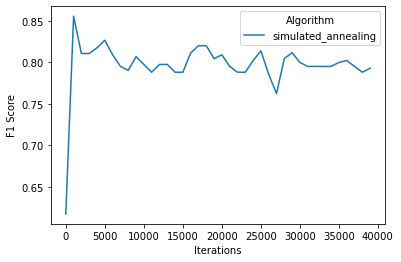

In [101]:
df_sa = pd.DataFrame(results, columns=["Iterations", "Algorithm", "Train Accuracy", "Test Accuracy", "F1 Score"])
sns.lineplot(data=df_sa, x="Iterations", y="F1 Score", hue="Algorithm")

<AxesSubplot:xlabel='Iterations', ylabel='Test Accuracy'>

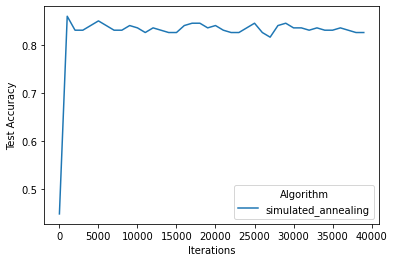

In [102]:
sns.lineplot(data=df_sa, x="Iterations", y="Test Accuracy", hue="Algorithm")


In [103]:
results = []
algorithm='simulated_annealing'
for i in range(1, 100, 10):
        model = mlrose.NeuralNetwork(hidden_nodes=[4], activation='relu',
                                        algorithm=algorithm, max_iters=2000,
                                        bias=True, is_classifier=True, learning_rate=i/100,
                                        early_stopping=True, clip_max=5, max_attempts=100,
                                        random_state=rs)
        model.fit(scaled_x1_train, y1_train)
        y_train_pred = model.predict(scaled_x1_train)
        y_train_accuracy = accuracy_score(y1_train, y_train_pred)

        y_test_pred = model.predict(scaled_x1_test)
        y_test_accuracy = accuracy_score(y1_test, y_test_pred)

        f1score = f1_score(y1_test, y_test_pred)

        results.append([i/100, algorithm, y_train_accuracy, y_test_accuracy, f1score])
        print([i/100, algorithm, y_train_accuracy, y_test_accuracy, f1score])
  

[0.01, 'simulated_annealing', 0.4658385093167702, 0.45893719806763283, 0.6241610738255033]
[0.11, 'simulated_annealing', 0.8530020703933747, 0.8405797101449275, 0.8176795580110496]
[0.21, 'simulated_annealing', 0.8467908902691511, 0.8405797101449275, 0.8092485549132947]
[0.31, 'simulated_annealing', 0.8509316770186336, 0.8454106280193237, 0.8333333333333333]
[0.41, 'simulated_annealing', 0.8467908902691511, 0.8454106280193237, 0.836734693877551]
[0.51, 'simulated_annealing', 0.8530020703933747, 0.8309178743961353, 0.8]
[0.61, 'simulated_annealing', 0.855072463768116, 0.8599033816425121, 0.8557213930348259]
[0.71, 'simulated_annealing', 0.8571428571428571, 0.8502415458937198, 0.8359788359788359]
[0.81, 'simulated_annealing', 0.8322981366459627, 0.8309178743961353, 0.7852760736196318]
[0.91, 'simulated_annealing', 0.8281573498964804, 0.821256038647343, 0.7643312101910829]


<AxesSubplot:xlabel='learning_rate', ylabel='Test Accuracy'>

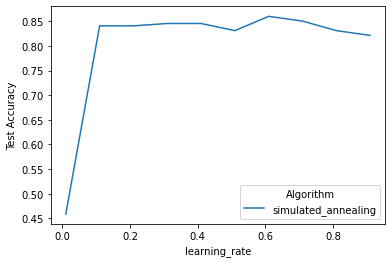

In [107]:
df_sa1 = pd.DataFrame(results, columns=["learning_rate", "Algorithm", "Train Accuracy", "Test Accuracy", "F1 Score"])
sns.lineplot(data=df_sa1, x="learning_rate", y="Test Accuracy", hue="Algorithm")

In [110]:
results = []
algorithm='simulated_annealing'
for i in range(1, 30000, 1000):
        model = mlrose.NeuralNetwork(hidden_nodes=[4], activation='relu',
                                        algorithm=algorithm, max_iters=i,
                                        bias=True, is_classifier=True, learning_rate=0.4,
                                        early_stopping=True, clip_max=5, max_attempts=100,
                                        random_state=rs)
        model.fit(scaled_x1_train, y1_train)
        y_train_pred = model.predict(scaled_x1_train)
        y_train_accuracy = accuracy_score(y1_train, y_train_pred)

        y_test_pred = model.predict(scaled_x1_test)
        y_test_accuracy = accuracy_score(y1_test, y_test_pred)

        f1score = f1_score(y1_test, y_test_pred)

        results.append([i, algorithm, y_train_accuracy, y_test_accuracy, f1score])
        print([i, algorithm, y_train_accuracy, y_test_accuracy, f1score])
  

[1, 'simulated_annealing', 0.44306418219461696, 0.4492753623188406, 0.6174496644295302]
[1001, 'simulated_annealing', 0.8509316770186336, 0.8405797101449275, 0.8156424581005587]
[2001, 'simulated_annealing', 0.8530020703933747, 0.8405797101449275, 0.8176795580110496]
[3001, 'simulated_annealing', 0.8530020703933747, 0.8405797101449275, 0.8176795580110496]
[4001, 'simulated_annealing', 0.8488612836438924, 0.8454106280193237, 0.8202247191011236]
[5001, 'simulated_annealing', 0.8488612836438924, 0.8454106280193237, 0.8202247191011236]
[6001, 'simulated_annealing', 0.8530020703933747, 0.855072463768116, 0.8333333333333334]
[7001, 'simulated_annealing', 0.8530020703933747, 0.8502415458937198, 0.8268156424581005]
[8001, 'simulated_annealing', 0.855072463768116, 0.8454106280193237, 0.8279569892473119]
[9001, 'simulated_annealing', 0.8364389233954451, 0.8454106280193237, 0.8139534883720929]
[10001, 'simulated_annealing', 0.84472049689441, 0.8454106280193237, 0.8260869565217392]
[11001, 'simula

<AxesSubplot:xlabel='Iterations', ylabel='Train Accuracy'>

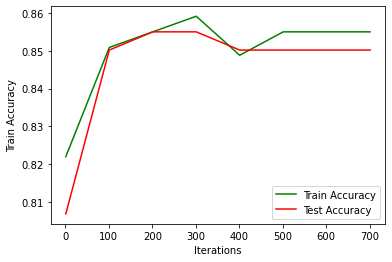

In [113]:
df_sa2 = pd.DataFrame(results, columns=["Iterations", "Algorithm", "Train Accuracy", "Test Accuracy", "F1 Score"])
sns.lineplot(data=df_sa2, x="Iterations", y="Train Accuracy", color="g", label = "Train Accuracy")
sns.lineplot(data=df_sa2, x="Iterations", y="Test Accuracy", color = "r",label = "Test Accuracy")

In [117]:
df_sa2['Test Accuracy'].mean()

0.8460144927536233

In [119]:

results = []
algorithm = algorithms[2]
for i in range(1, 1000, 200):
        model = mlrose.NeuralNetwork(hidden_nodes=[2], activation='relu',
                                        algorithm=algorithm, max_iters=i,
                                        bias=True, is_classifier=True, learning_rate=0.4,
                                        early_stopping=True, clip_max=5, max_attempts=100,
                                        random_state=rs, pop_size=200, mutation_prob = 0.1)

                                 
        model.fit(scaled_x1_train, y1_train)
        y_train_pred = model.predict(scaled_x1_train)
        y_train_accuracy = accuracy_score(y1_train, y_train_pred)

        y_test_pred = model.predict(scaled_x1_test)
        y_test_accuracy = accuracy_score(y1_test, y_test_pred)

        f1score = f1_score(y1_test, y_test_pred)

        results.append([i, algorithm, y_train_accuracy, y_test_accuracy, f1score])
        print([i, algorithm, y_train_accuracy, y_test_accuracy, f1score])

[1, 'genetic_alg', 0.556935817805383, 0.5507246376811594, 0.0]
[201, 'genetic_alg', 0.8281573498964804, 0.821256038647343, 0.7672955974842767]
[401, 'genetic_alg', 0.8281573498964804, 0.821256038647343, 0.7672955974842767]
[601, 'genetic_alg', 0.8281573498964804, 0.821256038647343, 0.7672955974842767]
[801, 'genetic_alg', 0.8281573498964804, 0.821256038647343, 0.7643312101910829]


<AxesSubplot:xlabel='Iterations', ylabel='F1 Score'>

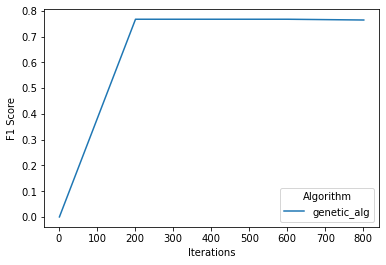

In [120]:
df_ga = pd.DataFrame(results, columns=["Iterations", "Algorithm", "Train Accuracy", "Test Accuracy", "F1 Score"])
sns.lineplot(data=df_ga, x="Iterations", y="F1 Score", hue="Algorithm")

<AxesSubplot:xlabel='Iterations', ylabel='Test Accuracy'>

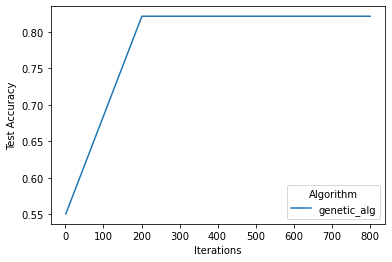

In [121]:
sns.lineplot(data=df_ga, x="Iterations", y="Test Accuracy", hue="Algorithm")

In [122]:
times = []
model = mlrose.NeuralNetwork(hidden_nodes=[4], activation='relu',
                                algorithm=algorithms[0], max_iters=3000,
                                bias=True, is_classifier=True, learning_rate=0.1,
                                early_stopping=True, clip_max=5, max_attempts=100)
start = time.time()    
model.fit(scaled_x1_train, y1_train)
traintime = time.time()-start
start = time.time() 
y_train_pred = model.predict(scaled_x1_train)
testime = time.time()-start
y_train_accuracy = accuracy_score(y1_train, y_train_pred)

y_test_pred = model.predict(scaled_x1_test)
y_test_accuracy = accuracy_score(y1_test, y_test_pred)

f1score = f1_score(y1_test, y_test_pred)

times.append([algorithms[0], traintime, y_test_accuracy, testime])

model = mlrose.NeuralNetwork(hidden_nodes=[4], activation='relu',
                                        algorithm=algorithms[1], max_iters=3000,
                                        bias=True, is_classifier=True, learning_rate=0.1,
                                        early_stopping=True, clip_max=5, max_attempts=100,
                                        random_state=rs)
start = time.time()    
model.fit(scaled_x1_train, y1_train)
traintime = time.time()-start
start = time.time() 
y_train_pred = model.predict(scaled_x1_train)
testime = time.time()-start
y_train_accuracy = accuracy_score(y1_train, y_train_pred)

y_test_pred = model.predict(scaled_x1_test)
y_test_accuracy = accuracy_score(y1_test, y_test_pred)

f1score = f1_score(y1_test, y_test_pred)
times.append([algorithms[1], traintime, y_test_accuracy, testime])

model = mlrose.NeuralNetwork(hidden_nodes=[4], activation='relu',
                                        algorithm=algorithms[2], max_iters=500,
                                        bias=True, is_classifier=True, learning_rate=0.1,
                                        early_stopping=True, clip_max=5, max_attempts=100,
                                        random_state=rs, pop_size=200, mutation_prob = 0.1)
start = time.time()    
model.fit(scaled_x1_train, y1_train)
traintime = time.time()-start
start = time.time() 
y_train_pred = model.predict(scaled_x1_train)
testime = time.time()-start
y_train_accuracy = accuracy_score(y1_train, y_train_pred)

y_test_pred = model.predict(scaled_x1_test)
y_test_accuracy = accuracy_score(y1_test, y_test_pred)

f1score = f1_score(y1_test, y_test_pred)
times.append([algorithms[2], traintime, y_test_accuracy, testime])
print(times)

[['random_hill_climb', 0.7589943408966064, 0.8357487922705314, 0.0], ['simulated_annealing', 1.9774940013885498, 0.8309178743961353, 0.0], ['genetic_alg', 38.228403091430664, 0.8502415458937198, 0.0]]


In [123]:
df_times = pd.DataFrame(times, columns=["Algorithm", "Training Time", "Test Accuracy", "Testing Time"])


In [124]:
df_times.head()


,Algorithm,Training Time,Test Accuracy,Testing Time
0,random_hill_climb,0.758994,0.835749,0.0
1,simulated_annealing,1.977494,0.830918,0.0
2,genetic_alg,38.228403,0.850242,0.0


In [125]:
df_times = df_times.melt(id_vars=["Algorithm"], 
        var_name=["Type"], 
        value_name="Value")

In [126]:
df_times.head(20)

,Algorithm,Type,Value
0,random_hill_climb,Training Time,0.758994
1,simulated_annealing,Training Time,1.977494
2,genetic_alg,Training Time,38.228403
3,random_hill_climb,Test Accuracy,0.835749
4,simulated_annealing,Test Accuracy,0.830918
5,genetic_alg,Test Accuracy,0.850242
6,random_hill_climb,Testing Time,0.000000
7,simulated_annealing,Testing Time,0.000000
8,genetic_alg,Testing Time,0.000000


In [132]:
algorithm = 'gradient_descent'
print(algorithm)
model = mlrose.NeuralNetwork(hidden_nodes=[2], activation='sigmoid',
                                algorithm='gradient_descent', max_iters=3000,
                                bias=True, is_classifier=True, learning_rate=0.01,
                                early_stopping=True, clip_max=5, max_attempts=100,
                                random_state=rs)
start = time.time()    
model.fit(scaled_x1_train, y1_train)
traintime = time.time()-start
print(traintime)
start = time.time() 
y_train_pred = model.predict(scaled_x1_train)
testime = time.time()-start
print(testime)
y_train_accuracy = accuracy_score(y1_train, y_train_pred)

y_test_pred = model.predict(scaled_x1_test)
y_test_accuracy = accuracy_score(y1_test, y_test_pred)

y_test_error = mean_squared_error(y1_test, y_test_pred)

f1score = f1_score(y1_test, y_test_pred)

results.append([i, algorithm, y_train_accuracy, y_test_accuracy,y_test_error, f1score])
print([i, algorithm, y_train_accuracy, y_test_accuracy,y_test_error, f1score])

gradient_descent
0.3248014450073242
0.0
[5001, 'gradient_descent', 0.8530020703933747, 0.8599033816425121, 0.14009661835748793, 0.8557213930348259]
